# 数字图像处理 入门
OpenCV官方文档：https://opencv-python-tutroals.readthedocs.io/en/latest/
图像理论
常用工具
图像处理常用操作


## 图像理论
### 颜色空间、通道

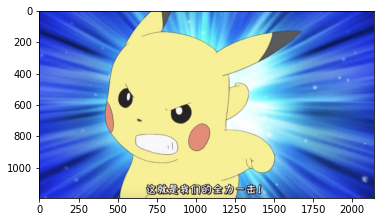

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

img_file = '/Users/panyining/Desktop/Pikachu.jpg'

img = io.imread(img_file)
plt.imshow(np.real(img))

In [2]:
img.shape

(1194, 2140, 3)

### 直方图

(Text(0.5, 1.0, 'Histogram'), ([], []), ([], []))

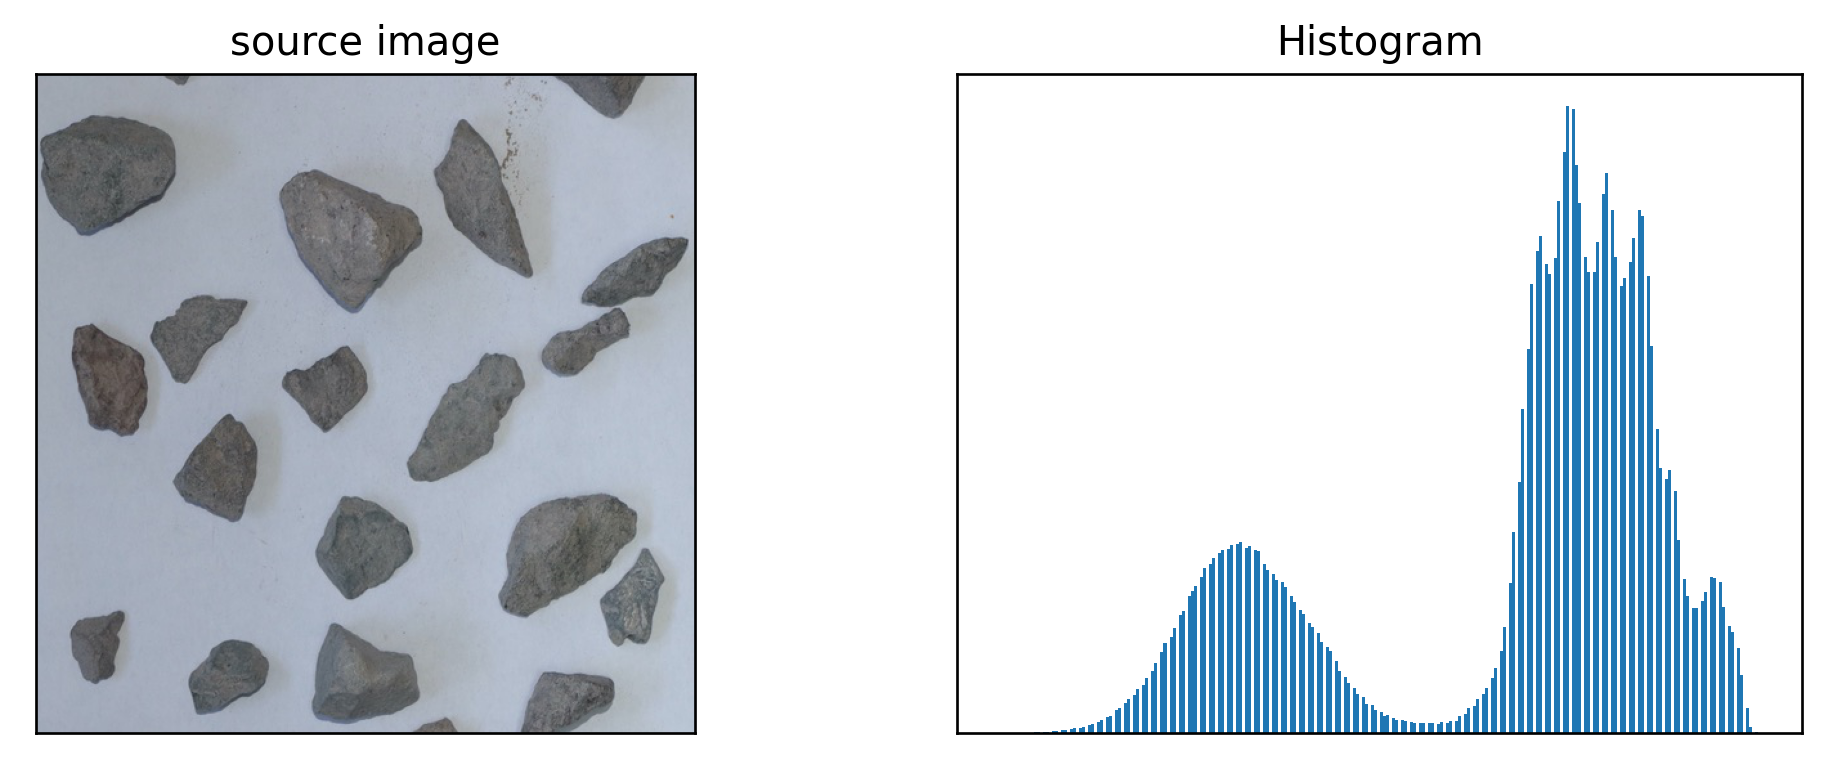

In [4]:
import cv2

s = '/Users/panyining/PycharmProjects/stones_detect/dataset/stones/JPEGImages/IMG_3921.jpeg'
image = cv2.imread(img_file)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 8), dpi=240)
plt.subplot(221), plt.imshow(image, 'gray')
plt.title('source image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.hist(image.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])


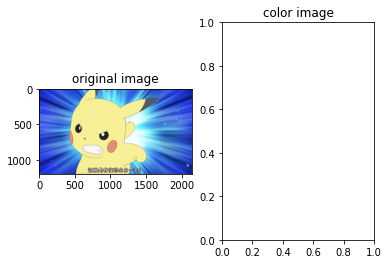

In [7]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

img_file = '/Users/panyining/Desktop/Pikachu.PNG'

# 读图片
img = io.imread(img_file)
plt.figure("Comparision")
plt.imshow(np.real(img))
plt.subplot(1, 2, 1)
plt.title('original image')

plt.imshow(np.real(img))
plt.subplot(1, 2, 2)
plt.title('color image')

plt.show()



## 常用工具
PIL：PIL和Pillow提供最基础的数字图像处理

skimage：基于scipy的一款图像处理包，将图像以numpy格式处理

OpenCV：集成的c++库、提供python接口

👀

matplotlib：用于在Python中创建静态，动画和交互式可视化

In [32]:
from PIL import Image
from skimage import io
import numpy as np
import cv2

img_file = '/Users/panyining/Desktop/Pikachu.PNG'

im = Image.open(img_file)
im2 = io.imread(img_file)
im3 = cv2.imread(img_file)

print(im.size, im2.shape, im3.shape)


(2140, 1194) (1194, 2140, 4) (1194, 2140, 3)


## OpenCV


### 读写


In [6]:
im3 = cv2.imread(img_file, 0)  # 灰度
im3 = cv2.cvtColor(im3, cv2.COLOR_GRAY2RGBA)  # 转换
# cv2.imwrite("./img/save.jpg", img)


### 基础操作
滤波：高斯、均值、中值
裁剪：crop
缩放：resize、插值cv2.INTER_NEAREST
描边：copyMakeBorder


In [3]:
import cv2

img=cv2.imread(img_file)

# 缩小为200x200的正方形
img_200x200=cv2.resize(img,(200,200))

# 插值方法默认为cv2.INTER_LINEAR,这里指定为最近邻插值
img_half=cv2.resize(img,(0,0),fx=0.5,fy=0.5,interpolation=cv2.INTER_NEAREST)

# 上下各贴50像素的黑边
img_add=cv2.copyMakeBorder(img,50,50,0,0,cv2.BORDER_CONSTANT,value=(0,0,0))

# 裁剪
patch_img=img[20:150,-180:-50]

# cv2.imshow("image",img_200x200)
# cv2.imshow("img_half",img_half)
# cv2.imshow("img_add",img_add)
# cv2.imshow("patch_img",patch_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 阈值操作

88.0


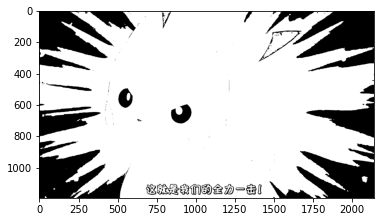

In [8]:
ret, th1 = cv2.threshold(im3, 88, 255, cv2.THRESH_BINARY)
plt.imshow(th1)
print(ret)

In [9]:
ret2, th2 = cv2.threshold(im3, 0, 255, cv2.THRESH_OTSU)  # 方法选择为THRESH_OTSU
plt.imshow(th2)
print(ret2)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/thresh.cpp:1406: error: (-215:Assertion failed) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'threshold'


### 位运算

([], [])

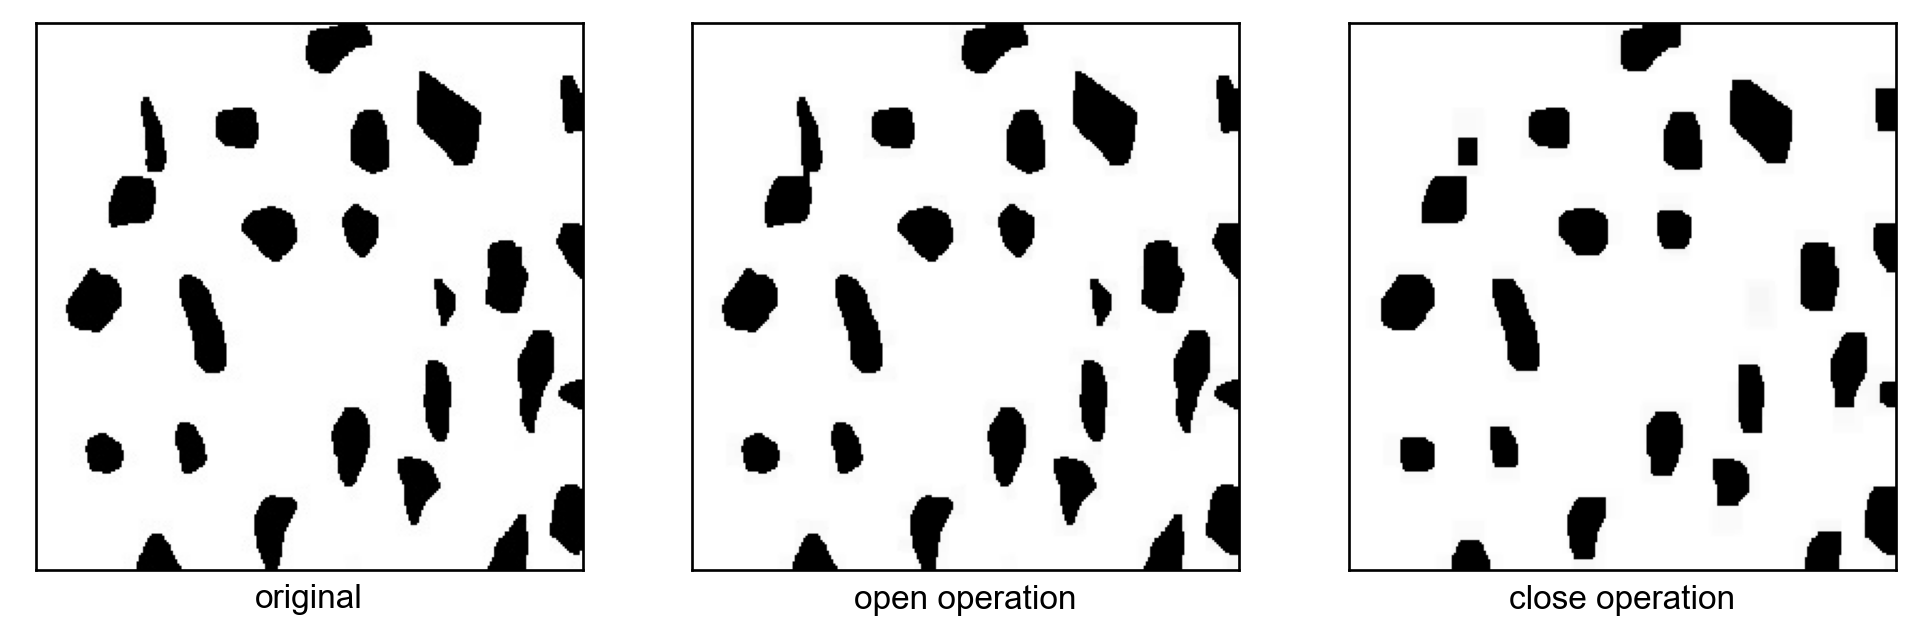

In [10]:
stone = '/Users/panyining/Desktop/stones/dataset/二值化OTSU256/IMG_3726.JPG'
gray=cv2.imread(stone, cv2.COLOR_RGB2GRAY)

#反二值化，小于127设为255，即黑变白；大于127的设为 0，即白变黑。
# ret,img2=cv.threshold(gray,127,255,cv.THRESH_BINARY_INV)

#定义一个卷积核
kernel=np.ones((5,5),np.uint8)
kernel2=np.ones((9,9),np.uint8)

#开/闭运算
opening2=cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel)
closing2=cv2.morphologyEx(opening2,cv2.MORPH_CLOSE,kernel2)

#图像腐蚀：cv2.dilate(输入图像，卷积核，iterations=腐蚀的次数)
dilation=cv2.dilate(opening2,kernel2,iterations=1)

plt.figure(figsize=(10, 8),dpi=240)
plt.subplot(131)
plt.imshow(gray)
plt.xlabel('original', fontproperties='Arial Unicode MS')
plt.yticks([])
plt.xticks([])
plt.subplot(132)
plt.imshow(opening2)
plt.xlabel('open operation', fontproperties='Arial Unicode MS')
plt.yticks([])
plt.xticks([])
plt.subplot(133)
plt.imshow(closing2)
plt.xlabel('close operation', fontproperties='Arial Unicode MS')
plt.yticks([])
plt.xticks([])

# cv2.imwrite(filePic, opening2)

### 边缘检测

In [11]:
import os
import cv2
img = cv2.imread(img_file, 0)#转化为灰度图
img_color = img
blur = cv2.GaussianBlur(img, (3, 3), 0)  # 用高斯滤波处理原图像降噪
canny = cv2.Canny(blur, 50, 150)  # 50是最小阈值,150是最大阈值
cv2.imshow('1', img)
cv2.imshow('canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

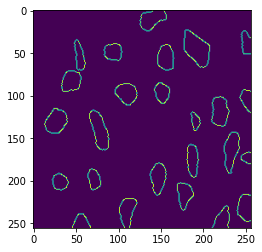

In [59]:
canny = cv2.Canny(gray, 101, 255) 
plt.imshow(canny)

## 数据增强

In [1]:
import sys
sys.path.append('..')

from PIL import Image
from torchvision import transforms as tfs


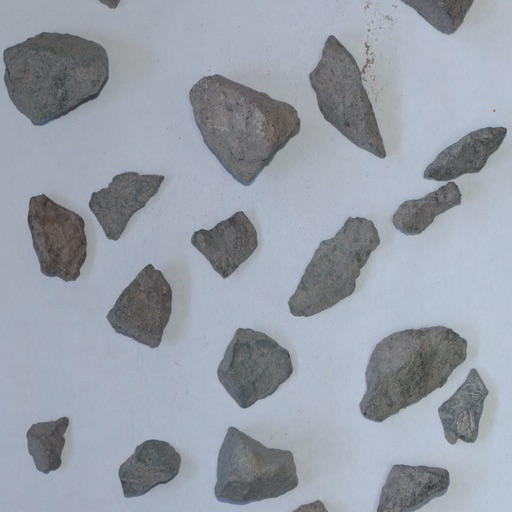

In [3]:
# 读入一张图片
s = '/Users/panyining/PycharmProjects/stones_detect/dataset/stones/JPEGImages/IMG_3921.jpeg'

im = Image.open(s)
im

In [ ]:
# 常用操作
random_im1 = tfs.RandomCrop(100)(im)
center_im = tfs.CenterCrop(100)(im)
h_filp = tfs.RandomHorizontalFlip()(im)
v_flip = tfs.RandomVerticalFlip()(im)
rot_im = tfs.RandomRotation(45)(im)
bright_im = tfs.ColorJitter(brightness=1)(im) # 随机从 0 ~ 2 之间亮度变化，1 表示原图
contrast_im = tfs.ColorJitter(contrast=1)(im) # 随机从 0 ~ 2 之间对比度变化，1 表示原图
color_im = tfs.ColorJitter(hue=0.5)(im) # 随机从 -0.5 ~ 0.5 之间对颜色变化


In [12]:
# 使用tfs.Compose封装
im_aug = tfs.Compose([
    tfs.Resize(126),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96),
    tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])


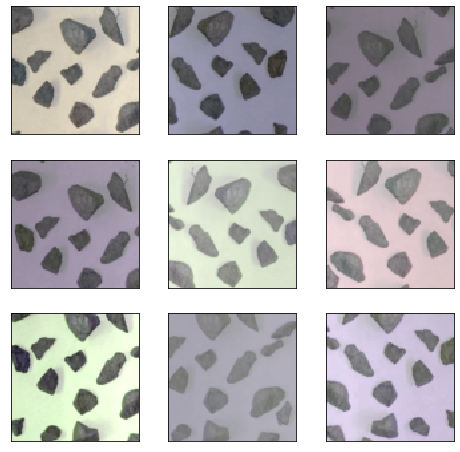

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()


In [ ]:
for i in range(len(nums)):
    if nums[i]==target:
        return i
    else:
        right = mid -1